In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import chainer

from chainercv import utils
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.datasets import voc_bbox_label_names

/home/daichi/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Faster RCNN

In [4]:
model = FasterRCNNVGG16(n_fg_class=len(voc_bbox_label_names), pretrained_model='voc07')
chainer.cuda.get_device_from_id(0).use()
model.to_gpu()

In [16]:
def larger_bbox(bbox):
    top_h = bbox[0]
    top_w = bbox[1]
    bottom_h = bbox[2]
    bottom_w = bbox[3]
    gravity_h = (top_h + bottom_h) / 2
    gravity_w = (top_w + bottom_w) / 2
    bbox[0] = gravity_h - abs(gravity_h - top_h) * 1.2
    bbox[1] = gravity_w - abs(gravity_w - top_w) * 1.2
    bbox[2] = gravity_h + abs(gravity_h - top_h) * 1.2
    bbox[3] = gravity_w + abs(gravity_w - top_w) * 1.2
    return bbox

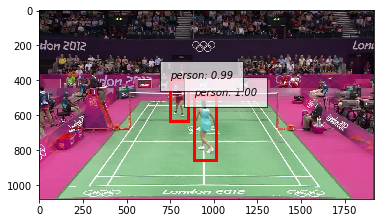

In [21]:
img = utils.read_image('../../badminton_action_recognition_using_pose_estimation/datasets/match_1/baun/img_008938.jpg', color=True)
bboxes, labels, scores = model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]
bbox[0] = larger_bbox(bbox[0])
bbox[1] = larger_bbox(bbox[1])
vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()

In [19]:
bbox

array([[ 515.59155,  897.25507,  827.9193 , 1000.1524 ],
       [ 410.52667,  756.48694,  611.62463,  843.7864 ]], dtype=float32)

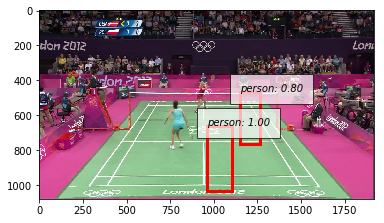

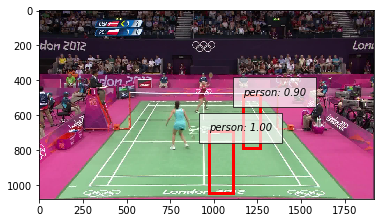

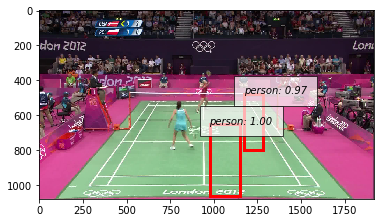

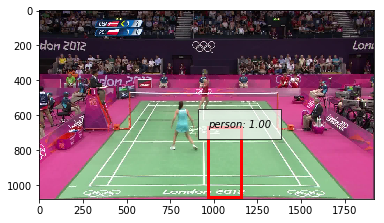

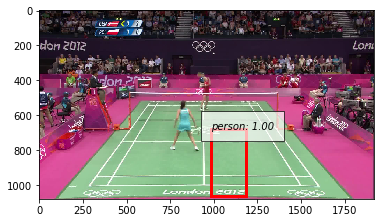

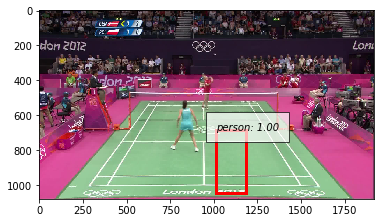

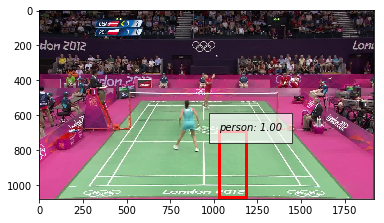

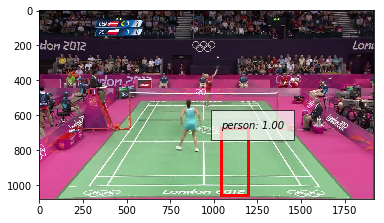

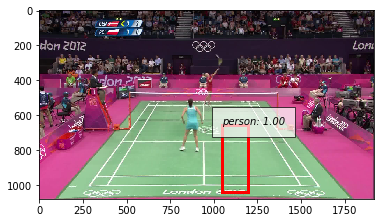

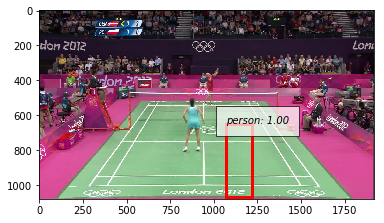

In [3]:
for i in range(10):
    img = utils.read_image('../../badminton_action_recognition_using_pose_estimation/datasets/match_1/baun/img_00898{}.jpg'.format(i), color=True)
    bboxes, labels, scores = model.predict([img])
    bbox, label, score = bboxes[0], labels[0], scores[0]
    vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
    plt.show()

## SSD512

In [19]:
from chainercv.links import SSD512

In [25]:
ssd_model = SSD512(n_fg_class=len(voc_bbox_label_names), pretrained_model='voc0712')
bboxes, labels, scores = ssd_model.predict([img])
bbox, label, score = bboxes[0], labels[0], scores[0]

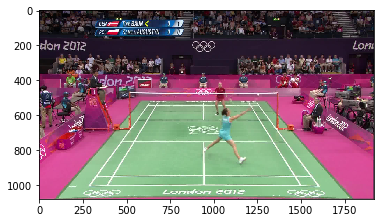

In [26]:
vis_bbox(img, bbox, label, score, label_names=voc_bbox_label_names)
plt.show()